In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming all singlegraph results are stored as CSV files in a directory
singlegraph_results = pd.concat([pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_True_False_1.csv'),
pd.read_csv('results_singlegraph_uniform_COBYLA_multiangle_False_True_False_1.csv'),
pd.read_csv('results_singlegraph_gaussian_uniform_COBYLA_recursive_False_False_1.csv'),
pd.read_csv('results_singlegraph_uniform_gaussian_COBYLA_vanilla_False_True_False_1.csv')
], ignore_index=True)

#singlegraph_results.to_csv('singlegraph_results_depth1.csv')
def warmstartconv(str):
    return 'warmstart' if str else 'regstart'
# Calculate the percent of optimal solution
singlegraph_results['percent_optimal'] = (singlegraph_results['quantum_obj_value'] / singlegraph_results['classic_value']) * 100
# Display the concatenated results
singlegraph_results.head()


,Unnamed: 0,param_initialization,optimizer,qaoa_variant,warm_start,errors,depth,graph_size,graph_name,time_elapsed,quantum_func_evals,obj_func_evolution,quantum_solution,quantum_obj_value,classic_solution,classic_value,percent_optimal
0,0,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,15.955351,155,"[array(0.16403546), array(0.09454393), array(-...","[1, 1, 0, 1, 0, 0, 1]",5.442387,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,80.432894
1,1,gaussian,COBYLA,multiangle,True,False,1,7,F?~vw,12.627668,121,"[array(0.02970452), array(0.20433072), array(0...","[1, 1, 0, 1, 1, 0, 0]",4.293020,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,63.446423
2,2,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,15.367194,148,"[array(-0.15251974), array(-0.05815718), array...","[1, 1, 1, 1, 0, 0, 0]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,100.000000
3,3,gaussian,COBYLA,multiangle,True,False,1,7,F?~vw,15.906112,155,"[array(-0.15542798), array(-0.17905445), array...","[1, 1, 1, 1, 0, 0, 0]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,100.000000
4,4,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,18.153775,177,"[array(-0.01093279), array(-0.18794926), array...","[0, 0, 0, 0, 1, 1, 1]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,100.000000


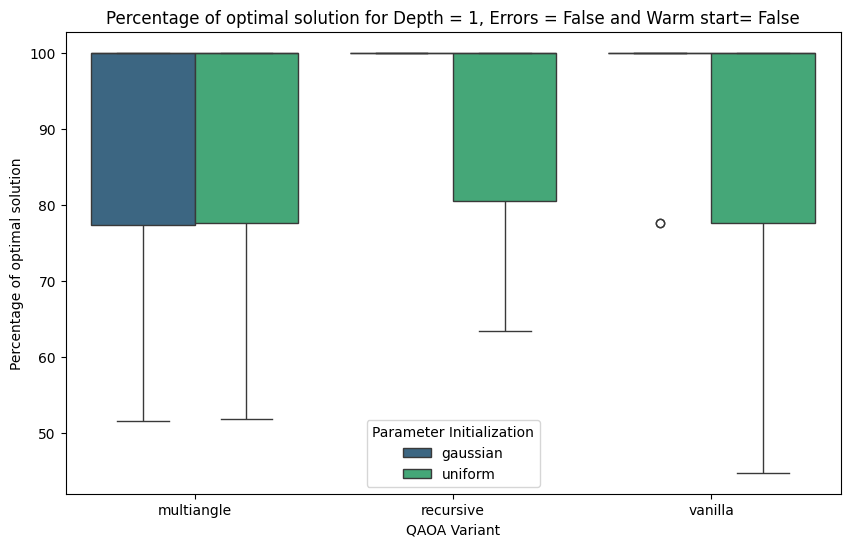

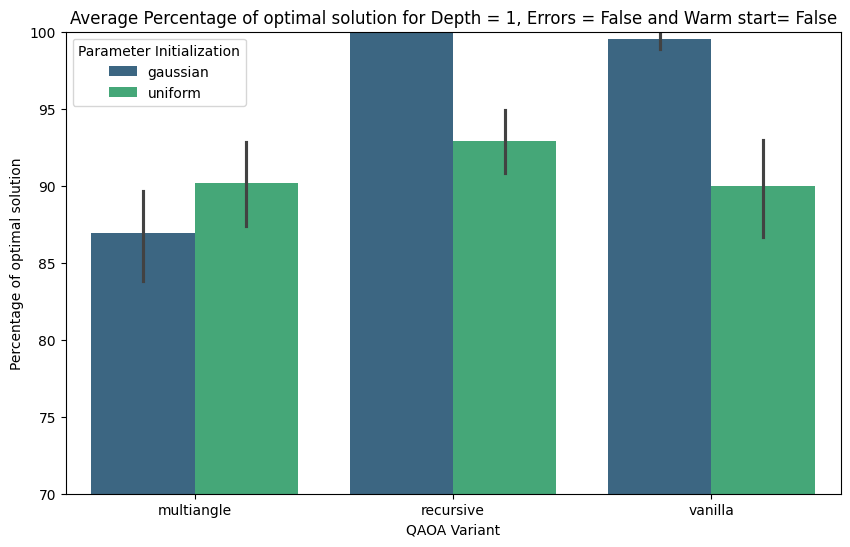

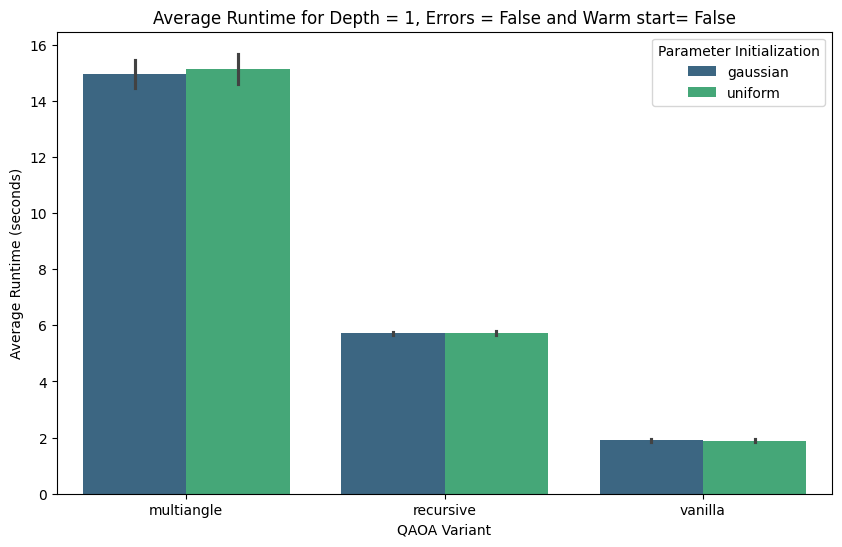

param_initialization    gaussian    uniform
qaoa_variant                               
multiangle             86.919425  90.147201
recursive             100.000000  92.922103
vanilla                99.551011  89.985935


In [58]:

compare_df = singlegraph_results[singlegraph_results['warm_start']==False]
# Calculate the average percent_optimal for each combination of qaoa_variant and param_initialization
avg_percent_optimal = compare_df.groupby(['qaoa_variant', 'param_initialization'])['percent_optimal'].mean().unstack()

# Plot the results using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='percent_optimal', hue='param_initialization', data=compare_df, palette='viridis')
plt.title('Percentage of optimal solution for Depth = 1, Errors = False and Warm start= False')
plt.xlabel('QAOA Variant')
plt.ylabel('Percentage of optimal solution')
plt.legend(title='Parameter Initialization')
plt.show()

# Plot the average percent_optimal using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=compare_df, x='qaoa_variant', y='percent_optimal', hue='param_initialization', palette='viridis')
plt.title('Average Percentage of optimal solution for Depth = 1, Errors = False and Warm start= False')
plt.xlabel('QAOA Variant')
plt.ylim(70, 100)
plt.ylabel('Percentage of optimal solution')
plt.legend(title='Parameter Initialization')
plt.show()

# Plot the runtime results using seaborn boxplot
# Calculate the average runtime for each combination of qaoa_variant and param_initialization
avg_runtime = compare_df.groupby(['qaoa_variant', 'param_initialization'])['time_elapsed'].mean().unstack()

# Plot the average runtime using seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=compare_df, x='qaoa_variant', y='time_elapsed', hue='param_initialization', palette='viridis')
plt.title('Average Runtime for Depth = 1, Errors = False and Warm start= False')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Runtime (seconds)')
plt.legend(title='Parameter Initialization')
plt.show()

print(avg_percent_optimal)


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_29932\3765635566.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['warm_start'] = filtered_results['warm_start'].map({True: 'Warm start', False: 'Equal superposition'})


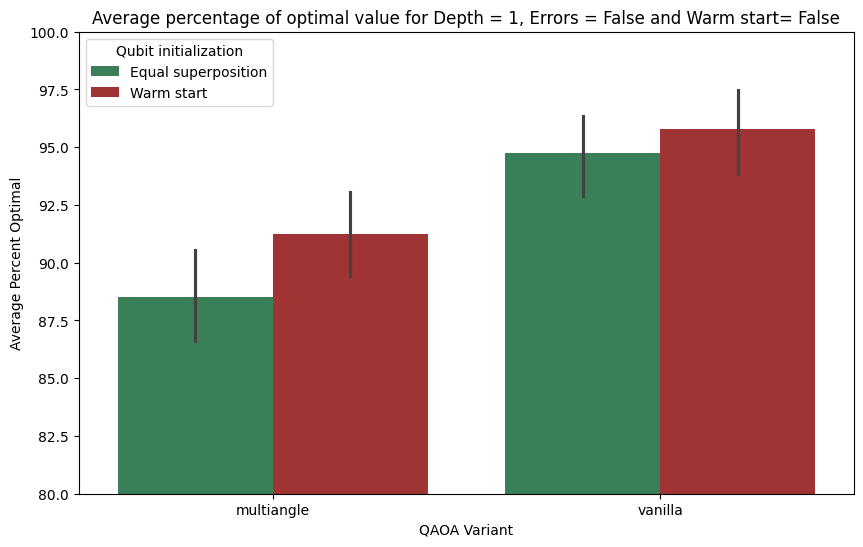

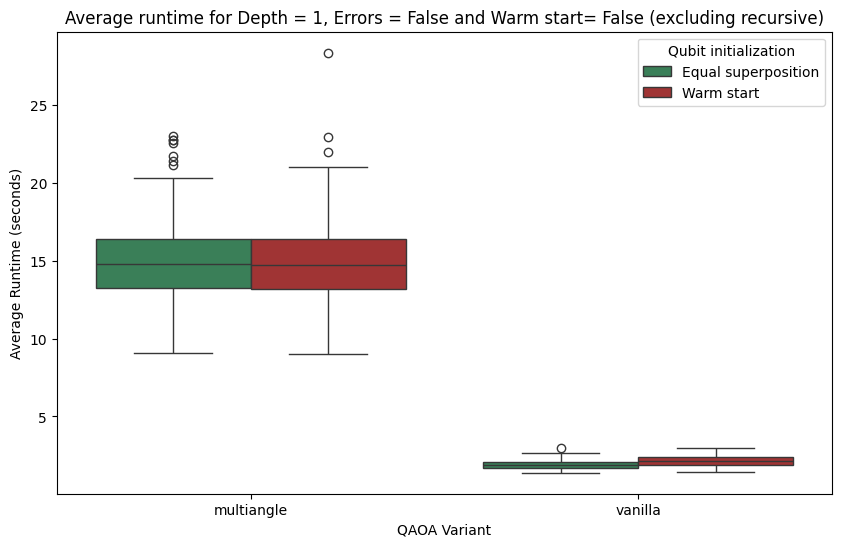

In [59]:
# Filter out the recursive variant
filtered_results = singlegraph_results[singlegraph_results['qaoa_variant'] != 'recursive']

# Calculate the average percent_optimal for each combination of warm_start and qaoa_variant
avg_percent_optimal_filtered = filtered_results.groupby(['qaoa_variant', 'warm_start'])['percent_optimal'].mean().unstack()

filtered_results['warm_start'] = filtered_results['warm_start'].map({True: 'Warm start', False: 'Equal superposition'})

# Plot the average percent_optimal using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_results, x='qaoa_variant', y='percent_optimal', hue='warm_start', palette=['#2E8B57', '#B22222'])
plt.title('Average percentage of optimal value for Depth = 1, Errors = False and Warm start= False')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Percent Optimal')
plt.ylim(80, 100)
plt.legend(title='Qubit initialization')
plt.show()

# Plot the average runtime using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='time_elapsed', hue='warm_start', data=filtered_results,palette=['#2E8B57', '#B22222'])
plt.title('Average runtime for Depth = 1, Errors = False and Warm start= False (excluding recursive)')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Runtime (seconds)')
plt.legend(title='Qubit initialization')
plt.show()


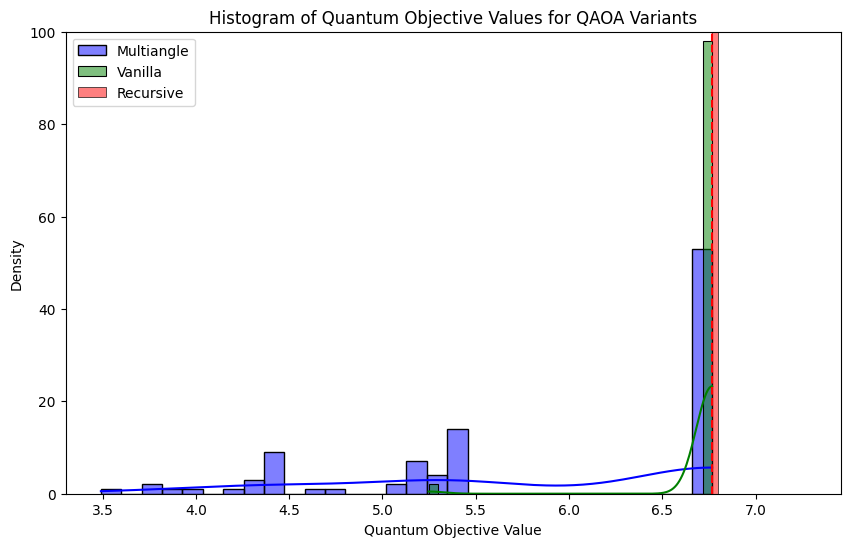

In [60]:
# Filter the results for qaoa_variant 'multiangle', 'vanilla', and 'recursive'

singlegraph_results = singlegraph_results[(singlegraph_results['param_initialization'] == 'gaussian') & (singlegraph_results['warm_start'] == False)]
multiangle_results = singlegraph_results[singlegraph_results['qaoa_variant'] == 'multiangle']
vanilla_results = singlegraph_results[singlegraph_results['qaoa_variant'] == 'vanilla']
recursive_results = singlegraph_results[singlegraph_results['qaoa_variant'] == 'recursive']

# Plot the histogram of quantum objective values with bins
plt.figure(figsize=(10, 6))
sns.histplot(multiangle_results['quantum_obj_value'], bins=30, kde=True, label='Multiangle', color='blue')
sns.histplot(vanilla_results['quantum_obj_value'], bins=30, kde=True, label='Vanilla', color='green')
sns.histplot(recursive_results['quantum_obj_value'], bins=30, kde=True, label='Recursive', color='red')
plt.axvline(x=6.76637017433752, color='red', linestyle='--')
plt.title('Histogram of Quantum Objective Values for QAOA Variants')
plt.xlabel('Quantum Objective Value')
plt.ylim(0,100)
plt.ylabel('Density')
plt.legend()
plt.show()

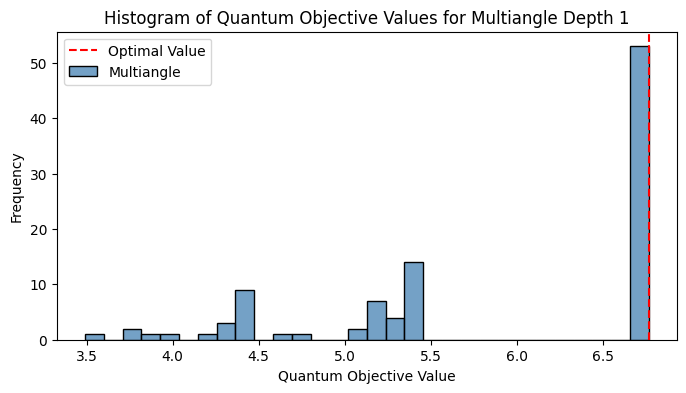

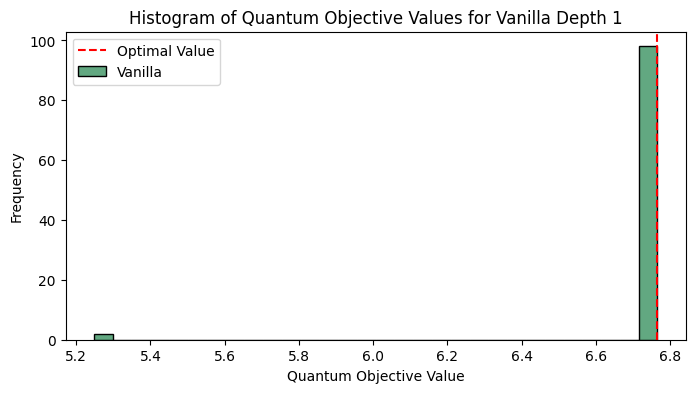

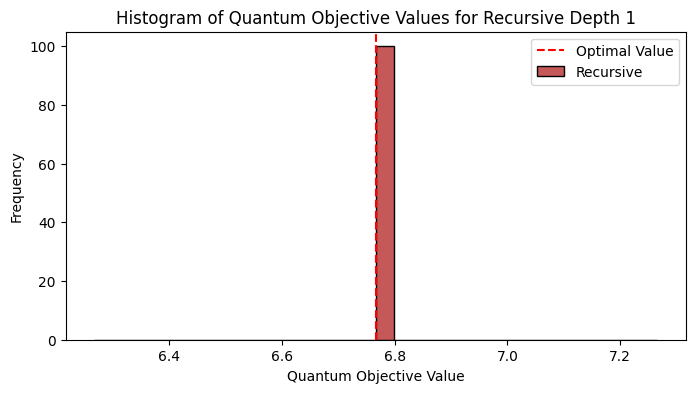

In [61]:
# Create a figure with three subplots
# Plot the histogram of quantum objective values for multiangle
plt.figure(figsize=(8, 4))
sns.histplot(multiangle_results['quantum_obj_value'], bins=30, kde=False, label='Multiangle', color='#4682B4')
plt.axvline(x=6.76637017433752, color='red', linestyle='--', label='Optimal Value')
plt.title('Histogram of Quantum Objective Values for Multiangle Depth 1')
plt.xlabel('Quantum Objective Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the histogram of quantum objective values for vanilla
plt.figure(figsize=(8, 4))
sns.histplot(vanilla_results['quantum_obj_value'], bins=30, kde=False, label='Vanilla', color='#2E8B57')
plt.axvline(x=6.76637017433752, color='red', linestyle='--', label='Optimal Value')
plt.title('Histogram of Quantum Objective Values for Vanilla Depth 1')
plt.xlabel('Quantum Objective Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#['#4682B4', '#2E8B57','#B22222']
# Plot the histogram of quantum objective values for recursive
plt.figure(figsize=(8, 4))
sns.histplot(recursive_results['quantum_obj_value'], bins=30, kde=False, label='Recursive', color='#B22222')
plt.axvline(x=6.76637017433752, color='red', linestyle='--', label='Optimal Value')
plt.title('Histogram of Quantum Objective Values for Recursive Depth 1')
plt.xlabel('Quantum Objective Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [62]:
depth_results = pd.concat([pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_False_1_3.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_False_5.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_recursive_False_False_1.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_recursive_False_False_3_5.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_vanilla_False_False_1_3_5.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_False_9_11_20_7.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_vanilla_False_False_9_11_20_7.csv')
], ignore_index=True)
depth_results.to_csv('singlegraph_results_depth1_3_5.csv')
depth_results.head()

,Unnamed: 0,param_initialization,optimizer,qaoa_variant,warm_start,errors,depth,graph_size,graph_name,time_elapsed,quantum_func_evals,obj_func_evolution,quantum_solution,quantum_obj_value,classic_solution,classic_value
0,0,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,16.642864,159,"[array(-0.0982533), array(-0.04873695), array(...","[0, 0, 0, 0, 1, 1, 1]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
1,1,gaussian,COBYLA,multiangle,False,False,3,7,F?~vw,58.539218,441,"[array(-0.15019596), array(-0.04434831), array...","[0, 0, 0, 0, 1, 1, 1]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
2,2,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,15.137011,146,"[array(0.13603586), array(-0.05829575), array(...","[1, 1, 1, 1, 0, 0, 0]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
3,3,gaussian,COBYLA,multiangle,False,False,3,7,F?~vw,50.063641,367,"[array(0.02853377), array(0.00871353), array(-...","[1, 1, 0, 1, 0, 0, 1]",5.442387,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
4,4,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,16.279710,159,"[array(-0.02515338), array(0.14838463), array(...","[0, 0, 1, 0, 1, 1, 0]",5.442387,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_29932\1206013021.py:5: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='qaoa_variant', y='percent_optimal', hue='depth', data=depth_results, palette=['#4682B4', '#2E8B57','#B22222'])


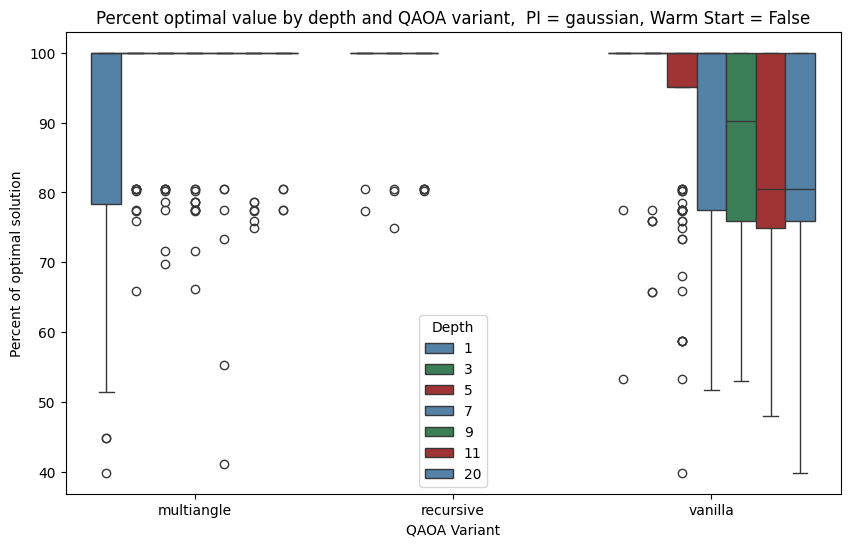

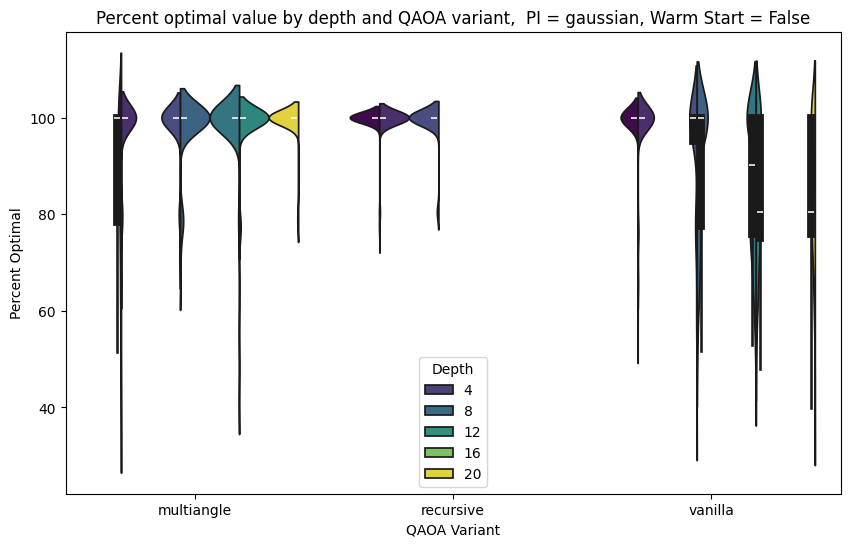

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_29932\1206013021.py:28: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=depth_results, x='qaoa_variant', y='percent_optimal', hue='depth',palette=['#4682B4', '#2E8B57','#B22222'])


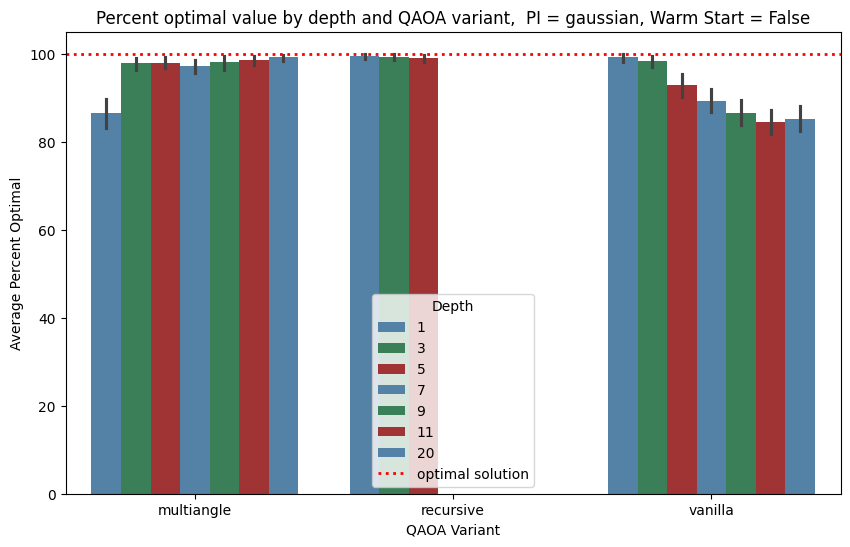

In [63]:
depth_results['percent_optimal'] = (depth_results['quantum_obj_value'] / depth_results['classic_value']) * 100

# Plot the results using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='percent_optimal', hue='depth', data=depth_results, palette=['#4682B4', '#2E8B57','#B22222'])
plt.title('Percent optimal value by depth and QAOA variant,  PI = gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Percent of optimal solution')
plt.legend(title='Depth')
plt.show()

# Plot the results using seaborn violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='qaoa_variant', y='percent_optimal', hue='depth', data=depth_results, split=True,palette='viridis')
plt.title('Percent optimal value by depth and QAOA variant,  PI = gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Percent Optimal')
plt.legend(title='Depth')
plt.show()

# Calculate the average percent_optimal for each combination of qaoa_variant and depth
avg_percent_optimal_depth = depth_results.groupby(['qaoa_variant', 'depth'])['percent_optimal'].mean().unstack()



# Plot the average percent_optimal using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=depth_results, x='qaoa_variant', y='percent_optimal', hue='depth',palette=['#4682B4', '#2E8B57','#B22222'])
plt.axhline(y=100, color='red', linestyle=':', linewidth=2, label='optimal solution')
plt.title('Percent optimal value by depth and QAOA variant,  PI = gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Percent Optimal')
plt.legend(title='Depth')
plt.show()

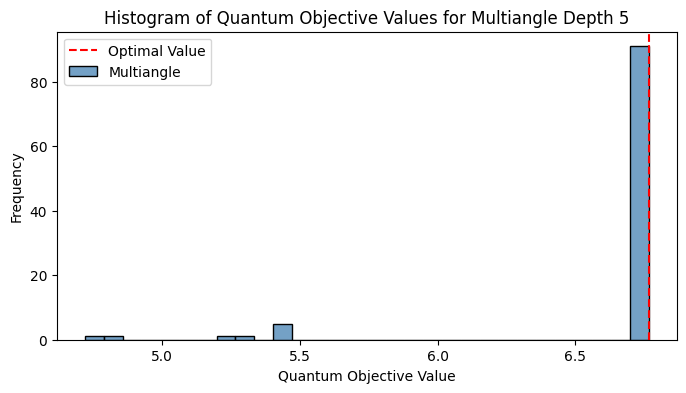

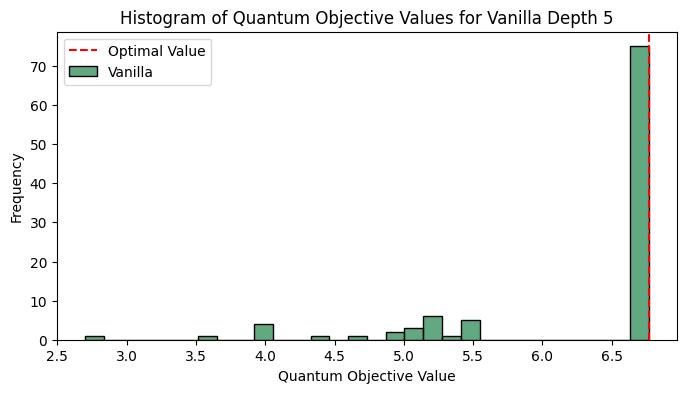

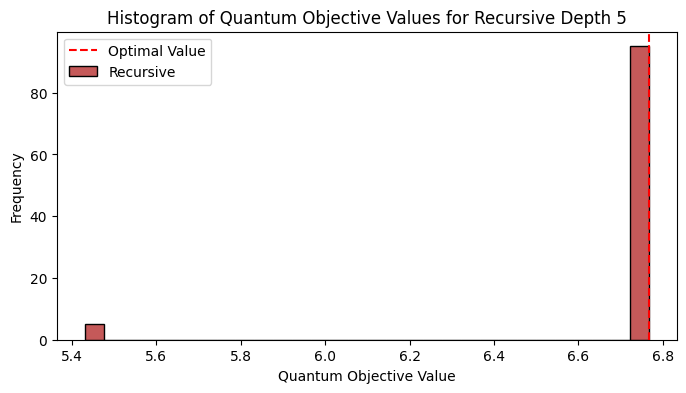

In [64]:
# Filter the results for depth 5
depth_5_results = depth_results[depth_results['depth'] == 5]

# Filter the results for qaoa_variant 'multiangle', 'vanilla', and 'recursive'
multiangle_results_depth_5 = depth_5_results[depth_5_results['qaoa_variant'] == 'multiangle']
vanilla_results_depth_5 = depth_5_results[depth_5_results['qaoa_variant'] == 'vanilla']
recursive_results_depth_5 = depth_5_results[depth_5_results['qaoa_variant'] == 'recursive']

# Plot the histogram of quantum objective values for multiangle
plt.figure(figsize=(8, 4))
sns.histplot(multiangle_results_depth_5['quantum_obj_value'], bins=30, kde=False, label='Multiangle', color='#4682B4')
plt.axvline(x=6.76637017433752, color='red', linestyle='--', label='Optimal Value')
plt.title('Histogram of Quantum Objective Values for Multiangle Depth 5')
plt.xlabel('Quantum Objective Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the histogram of quantum objective values for vanilla
plt.figure(figsize=(8, 4))
sns.histplot(vanilla_results_depth_5['quantum_obj_value'], bins=30, kde=False, label='Vanilla', color='#2E8B57')
plt.axvline(x=6.76637017433752, color='red', linestyle='--', label='Optimal Value')
plt.title('Histogram of Quantum Objective Values for Vanilla Depth 5')
plt.xlabel('Quantum Objective Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the histogram of quantum objective values for recursive
plt.figure(figsize=(8, 4))
sns.histplot(recursive_results_depth_5['quantum_obj_value'], bins=30, kde=False, label='Recursive', color='#B22222')
plt.axvline(x=6.76637017433752, color='red', linestyle='--', label='Optimal Value')
plt.title('Histogram of Quantum Objective Values for Recursive Depth 5')
plt.xlabel('Quantum Objective Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [71]:
results_errors = pd.concat([pd.read_csv('results_singlegraph_gaussian_COBYLA_recursive_vanilla_False_True_1.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_True_1.csv')
])
results_errors.head()

,Unnamed: 0,param_initialization,optimizer,qaoa_variant,warm_start,errors,depth,graph_size,graph_name,time_elapsed,quantum_func_evals,obj_func_evolution,quantum_solution,quantum_obj_value,classic_solution,classic_value
0,0,gaussian,COBYLA,recursive,False,True,1,7,F?~vw,150.492951,121,[],[1. 1. 1. 1. 0. 0. 0.],6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
1,1,gaussian,COBYLA,vanilla,False,True,1,7,F?~vw,62.940075,19,"[array(0.89862923), array(-0.2988279), array(-...","[0, 0, 0, 0, 1, 1, 1]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
2,2,gaussian,COBYLA,recursive,False,True,1,7,F?~vw,168.329002,126,[],[1. 1. 1. 1. 0. 0. 0.],6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
3,3,gaussian,COBYLA,vanilla,False,True,1,7,F?~vw,53.816307,16,"[array(0.63491382), array(-0.05246015), array(...","[0, 0, 0, 1, 1, 0, 1]",5.247357,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
4,4,gaussian,COBYLA,recursive,False,True,1,7,F?~vw,159.195370,124,[],[1. 1. 1. 1. 0. 0. 0.],6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637


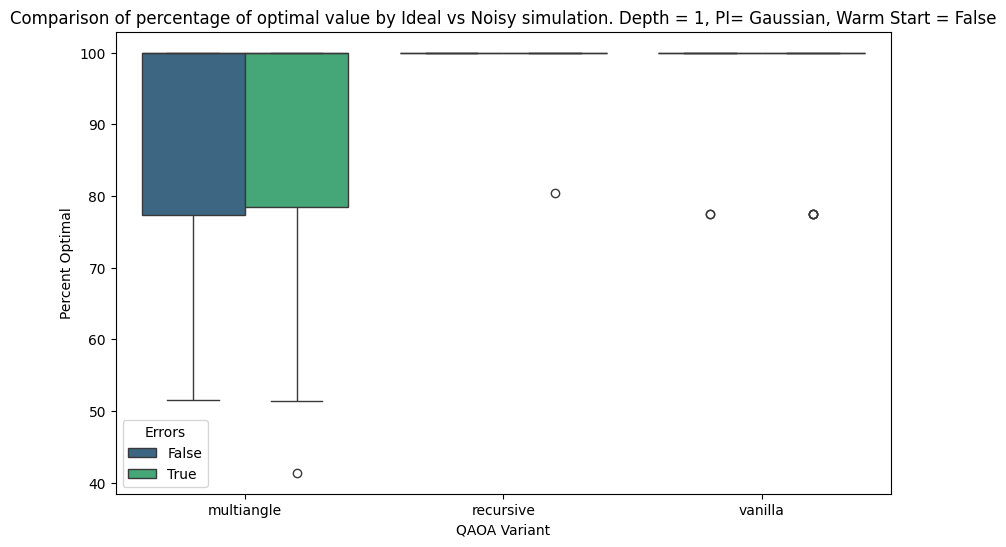

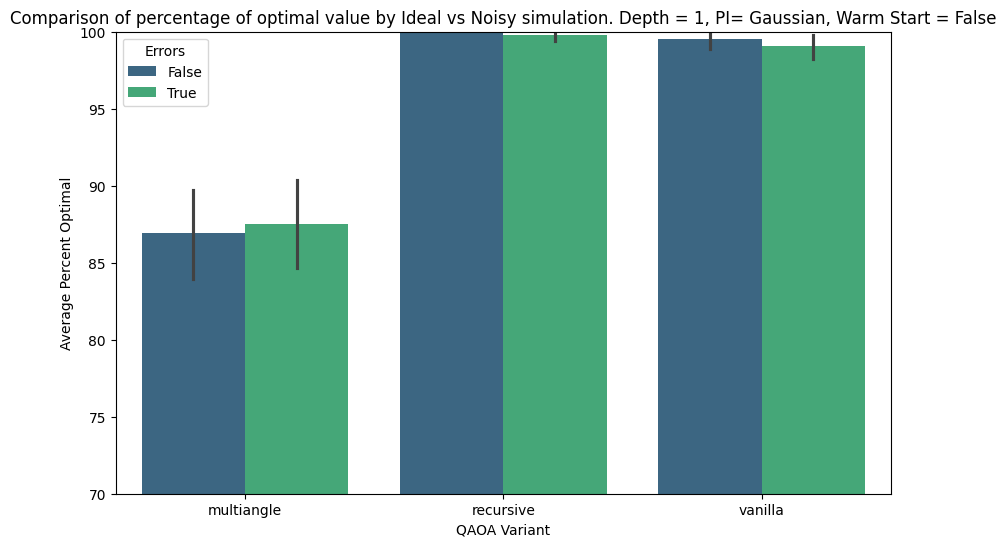

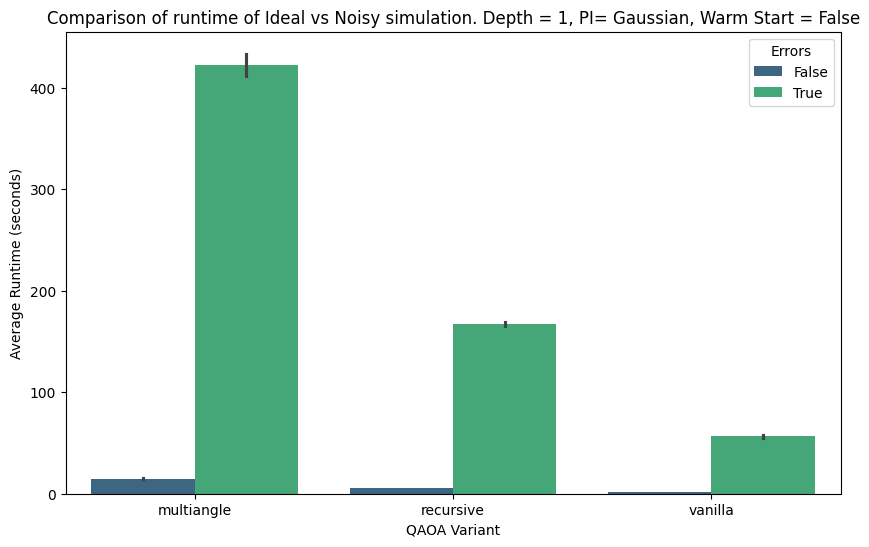

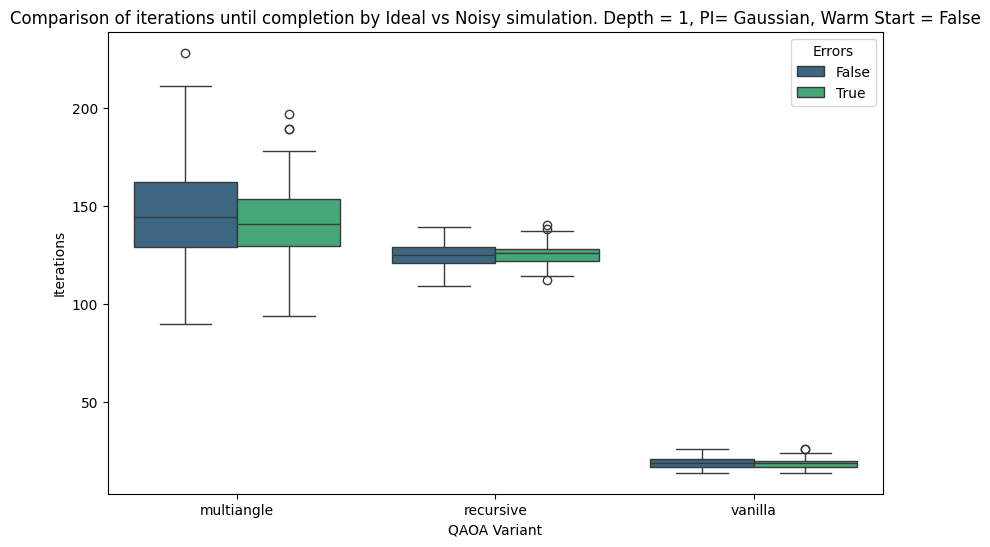

Average quantum function evaluations for noisy simulation of vanilla: 18.66
Average runtime for noisy simulation of vanilla: 56.3675292801857


In [72]:
# Calculate the average percent_optimal for each combination of qaoa_variant and param_initialization
results_errors['percent_optimal'] = (results_errors['quantum_obj_value'] / results_errors['classic_value']) * 100
avg_percent_optimal = results_errors.groupby(['qaoa_variant', 'param_initialization'])['percent_optimal'].mean().unstack()

singlegraph_results = pd.concat([pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_True_False_1.csv'),
pd.read_csv('results_singlegraph_uniform_COBYLA_multiangle_False_True_False_1.csv'),
pd.read_csv('results_singlegraph_gaussian_uniform_COBYLA_recursive_False_False_1.csv'),
pd.read_csv('results_singlegraph_uniform_gaussian_COBYLA_vanilla_False_True_False_1.csv')
], ignore_index=True)
singlegraph_results['percent_optimal'] = (singlegraph_results['quantum_obj_value'] / singlegraph_results['classic_value']) * 100

singlegraph_results = singlegraph_results[(singlegraph_results['depth'] == 1) & (singlegraph_results['errors'] == False) & (singlegraph_results['param_initialization'] == 'gaussian') & (singlegraph_results['warm_start'] == False)]
results_errors = pd.concat([singlegraph_results,results_errors ])
# Plot the results using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='percent_optimal', hue='errors', data=results_errors, palette='viridis')
plt.title('Comparison of percentage of optimal value by Ideal vs Noisy simulation. Depth = 1, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Percent Optimal')
plt.legend(title='Errors')
plt.show()

# Plot the average percent_optimal using a bar plot
# Plot the average percent_optimal using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_errors, x='qaoa_variant', y='percent_optimal', hue='errors', palette='viridis')
plt.title('Comparison of percentage of optimal value by Ideal vs Noisy simulation. Depth = 1, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylim(70, 100)
plt.ylabel('Average Percent Optimal')
plt.legend(title='Errors')
plt.show()

# Plot the runtime results using seaborn boxplot
# Calculate the average runtime for each combination of qaoa_variant and param_initialization
avg_runtime = results_errors.groupby(['qaoa_variant', 'param_initialization'])['time_elapsed'].mean().unstack()

# Plot the average runtime using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_errors, x='qaoa_variant', y='time_elapsed', hue='errors', palette='viridis')
plt.title('Comparison of runtime of Ideal vs Noisy simulation. Depth = 1, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Runtime (seconds)')
plt.legend(title='Errors')
plt.show()

# Plot the quantum function evaluations using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='quantum_func_evals', hue='errors', data=results_errors, palette='viridis')
plt.title('Comparison of iterations until completion by Ideal vs Noisy simulation. Depth = 1, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Iterations')
plt.legend(title='Errors')
plt.show()
avg_quantum_func_evals_noisy_vanilla = results_errors[(results_errors['qaoa_variant'] == 'vanilla') & (results_errors['errors'] == True)]['quantum_func_evals'].mean()
print(f"Average quantum function evaluations for noisy simulation of vanilla: {avg_quantum_func_evals_noisy_vanilla}")
avg_runtime_noisy_vanilla = results_errors[(results_errors['qaoa_variant'] == 'vanilla') & (results_errors['errors'] == True)]['time_elapsed'].mean()
print(f"Average runtime for noisy simulation of vanilla: {avg_runtime_noisy_vanilla}")

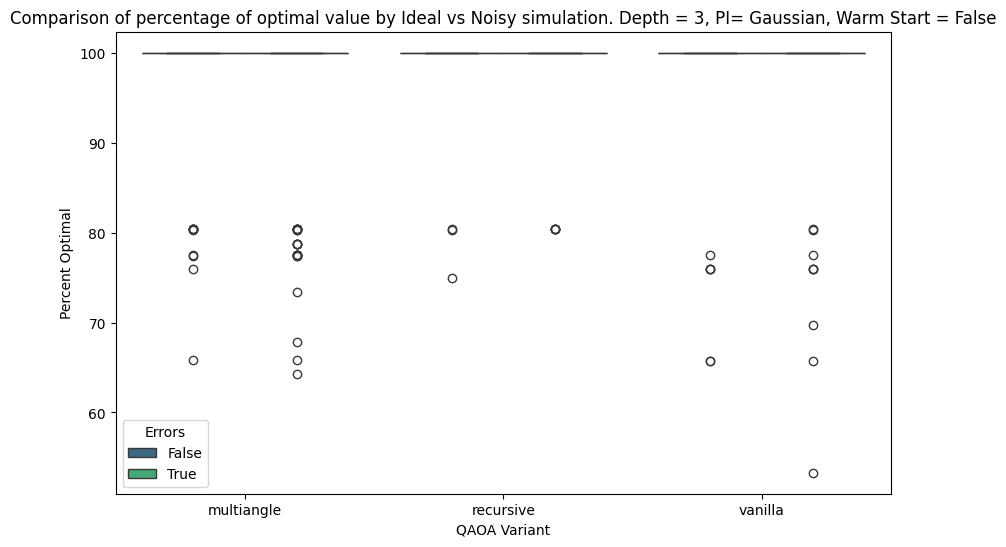

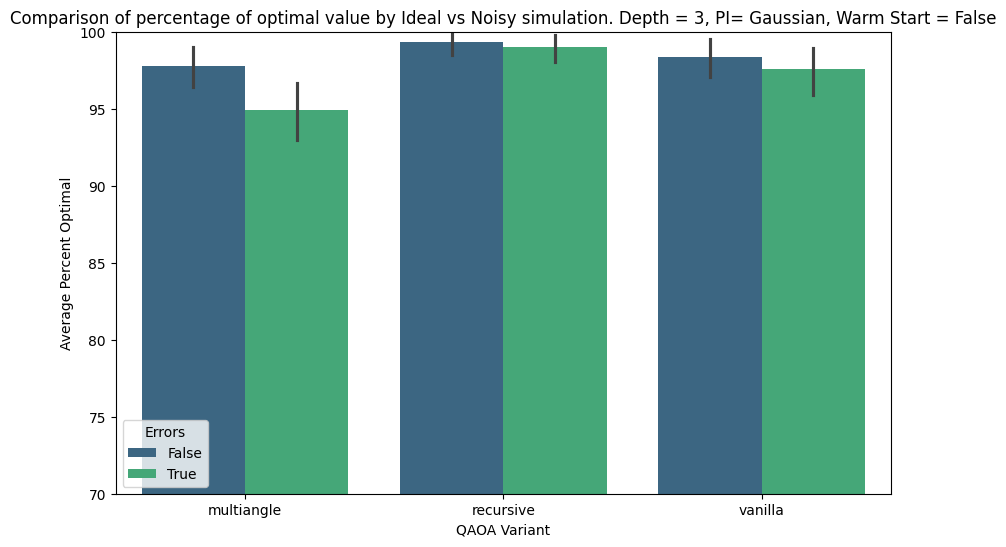

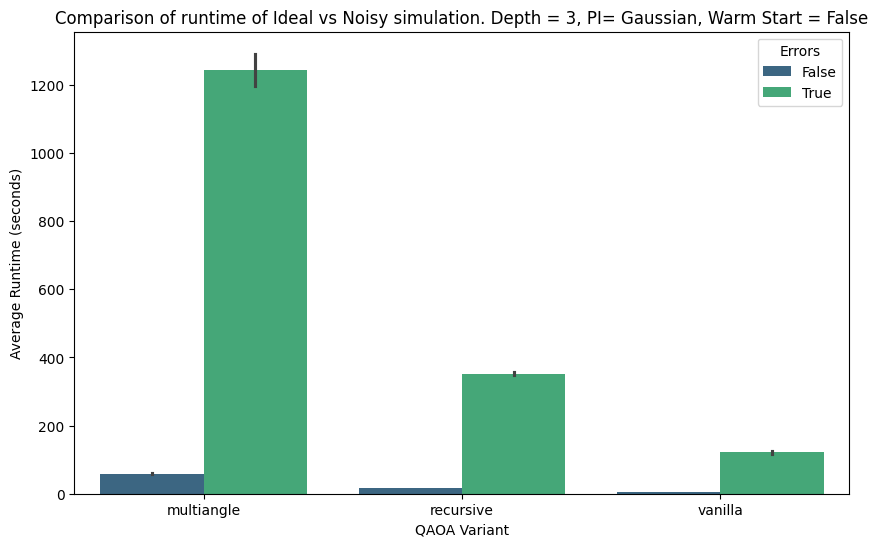

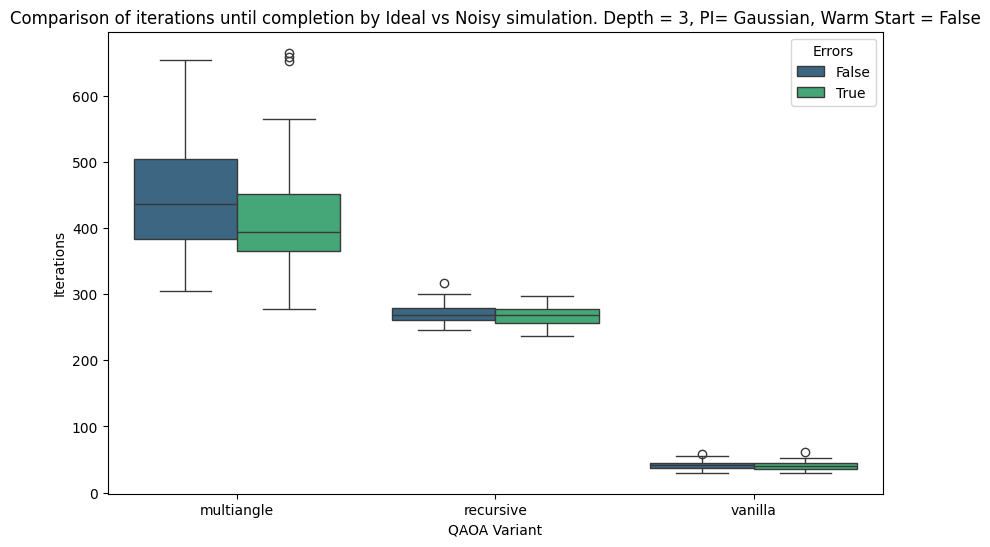

In [67]:
results_errors = pd.read_csv('results_singlegraph_gaussian_COBYLA_recursive_multiangle_vanilla_False_True_3.csv')
# Calculate the average percent_optimal for each combination of qaoa_variant and param_initialization
results_errors['percent_optimal'] = (results_errors['quantum_obj_value'] / results_errors['classic_value']) * 100
avg_percent_optimal = results_errors.groupby(['qaoa_variant', 'param_initialization'])['percent_optimal'].mean().unstack()

singlegraph_results = pd.concat([pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_False_1_3.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_recursive_False_False_3_5.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_vanilla_False_False_1_3_5.csv')
], ignore_index=True)
singlegraph_results['percent_optimal'] = (singlegraph_results['quantum_obj_value'] / singlegraph_results['classic_value']) * 100

singlegraph_results = singlegraph_results[(singlegraph_results['depth'] == 3) & (singlegraph_results['errors'] == False) & (singlegraph_results['param_initialization'] == 'gaussian') & (singlegraph_results['warm_start'] == False)]
results_errors = pd.concat([singlegraph_results,results_errors ])
# Plot the results using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='percent_optimal', hue='errors', data=results_errors, palette='viridis')
plt.title('Comparison of percentage of optimal value by Ideal vs Noisy simulation. Depth = 3, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Percent Optimal')
plt.legend(title='Errors')
plt.show()

# Plot the average percent_optimal using a bar plot
# Plot the average percent_optimal using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_errors, x='qaoa_variant', y='percent_optimal', hue='errors', palette='viridis')
plt.title('Comparison of percentage of optimal value by Ideal vs Noisy simulation. Depth = 3, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylim(70, 100)
plt.ylabel('Average Percent Optimal')
plt.legend(title='Errors')
plt.show()

# Plot the runtime results using seaborn boxplot
# Calculate the average runtime for each combination of qaoa_variant and param_initialization
avg_runtime = results_errors.groupby(['qaoa_variant', 'param_initialization'])['time_elapsed'].mean().unstack()

# Plot the average runtime using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_errors, x='qaoa_variant', y='time_elapsed', hue='errors', palette='viridis')
plt.title('Comparison of runtime of Ideal vs Noisy simulation. Depth = 3, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Runtime (seconds)')
plt.legend(title='Errors')
plt.show()

# Plot the quantum function evaluations using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='quantum_func_evals', hue='errors', data=results_errors, palette='viridis')
plt.title('Comparison of iterations until completion by Ideal vs Noisy simulation. Depth = 3, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Iterations')
plt.legend(title='Errors')
plt.show()

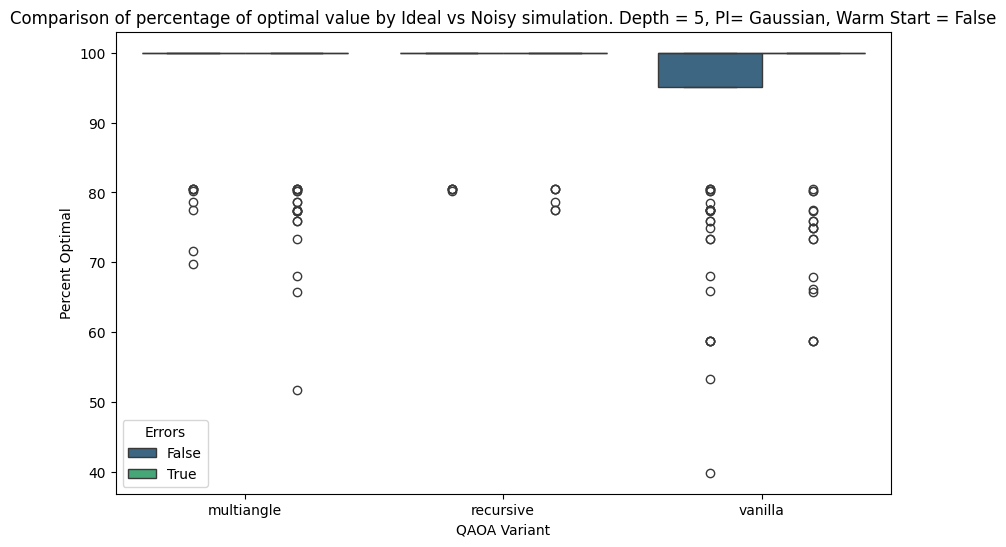

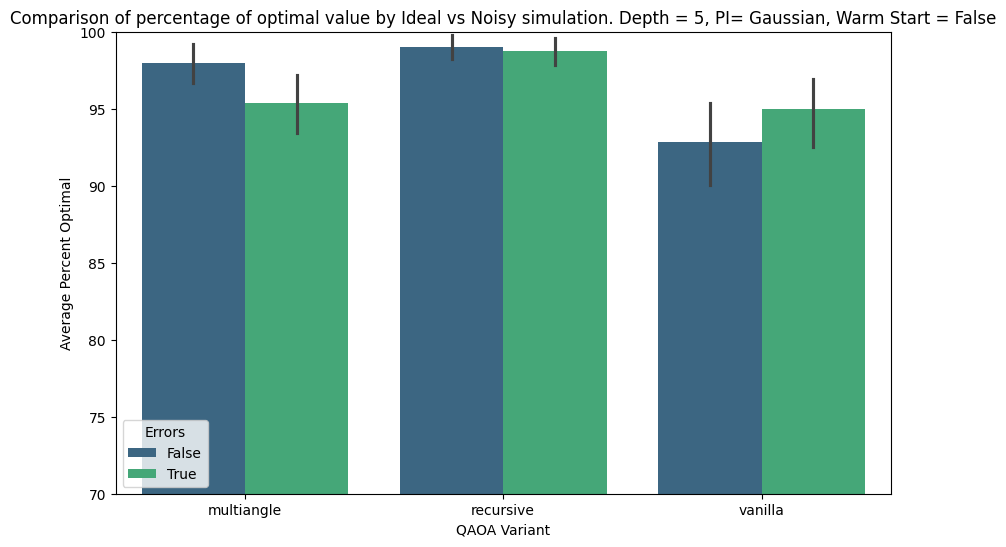

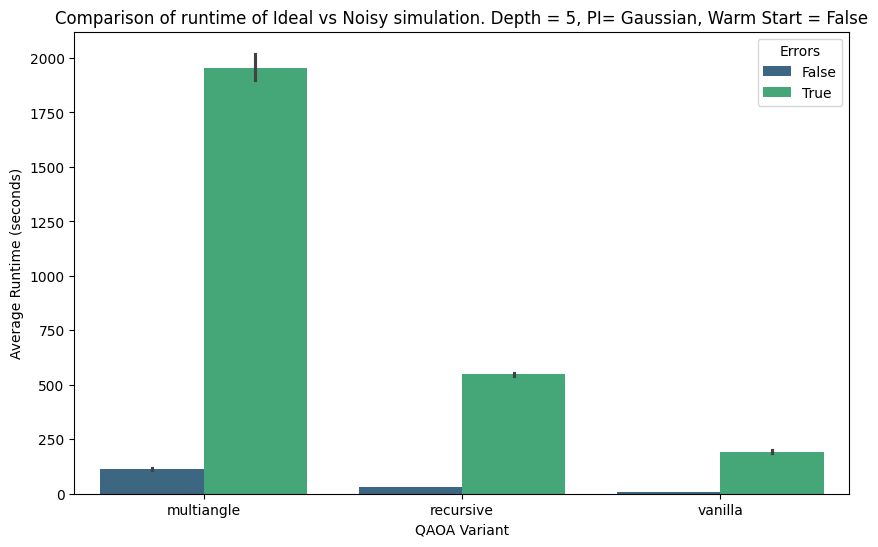

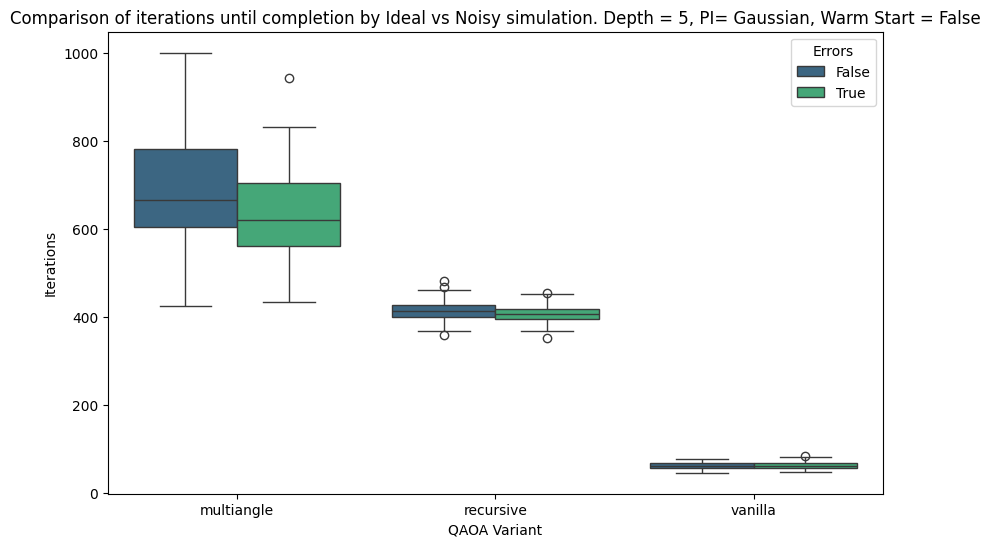

In [68]:
results_errors = pd.read_csv('results_singlegraph_gaussian_COBYLA_recursive_multiangle_vanilla_False_True_5.csv')
# Calculate the average percent_optimal for each combination of qaoa_variant and param_initialization
results_errors['percent_optimal'] = (results_errors['quantum_obj_value'] / results_errors['classic_value']) * 100
avg_percent_optimal = results_errors.groupby(['qaoa_variant', 'param_initialization'])['percent_optimal'].mean().unstack()

singlegraph_results = pd.concat([pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_False_5.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_recursive_False_False_3_5.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_vanilla_False_False_1_3_5.csv')
], ignore_index=True)
singlegraph_results['percent_optimal'] = (singlegraph_results['quantum_obj_value'] / singlegraph_results['classic_value']) * 100

singlegraph_results = singlegraph_results[(singlegraph_results['depth'] == 5) & (singlegraph_results['errors'] == False) & (singlegraph_results['param_initialization'] == 'gaussian') & (singlegraph_results['warm_start'] == False)]
results_errors = pd.concat([singlegraph_results,results_errors ])
# Plot the results using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='percent_optimal', hue='errors', data=results_errors, palette='viridis')
plt.title('Comparison of percentage of optimal value by Ideal vs Noisy simulation. Depth = 5, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Percent Optimal')
plt.legend(title='Errors')
plt.show()

# Plot the average percent_optimal using a bar plot
# Plot the average percent_optimal using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_errors, x='qaoa_variant', y='percent_optimal', hue='errors', palette='viridis')
plt.title('Comparison of percentage of optimal value by Ideal vs Noisy simulation. Depth = 5, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylim(70, 100)
plt.ylabel('Average Percent Optimal')
plt.legend(title='Errors')
plt.show()

# Plot the runtime results using seaborn boxplot
# Calculate the average runtime for each combination of qaoa_variant and param_initialization
avg_runtime = results_errors.groupby(['qaoa_variant', 'param_initialization'])['time_elapsed'].mean().unstack()

# Plot the average runtime using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_errors, x='qaoa_variant', y='time_elapsed', hue='errors', palette='viridis')
plt.title('Comparison of runtime of Ideal vs Noisy simulation. Depth = 5, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Runtime (seconds)')
plt.legend(title='Errors')
plt.show()

# Plot the quantum function evaluations using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='quantum_func_evals', hue='errors', data=results_errors, palette='viridis')
plt.title('Comparison of iterations until completion by Ideal vs Noisy simulation. Depth = 5, PI= Gaussian, Warm Start = False')
plt.xlabel('QAOA Variant')
plt.ylabel('Iterations')
plt.legend(title='Errors')
plt.show()

In [69]:
ibm_result = {'param_initialization': 'gaussian', 'optimizer': 'COBYLA', 'qaoa_variant': 'vanilla', 'warm_start': False, 'errors': True, 'depth': 1, 'graph_size': 7, 'graph_name': 'F?~vw', 'time_elapsed': 623.6846203804016, 'quantum_func_evals': 20, 'obj_func_evolution': "[array(-0.12019498), array(-0.01950199), array(0.03105823), array(-0.21721581), array(0.10566043), array(-0.43948468), array(0.0213455), array(-0.22595473), array(0.30489764), array(-0.35088708), array(-0.34982192), array(-0.20600944), array(-0.32054303), array(-0.31182754), array(-0.46318402), array(-0.31961521), array(-0.29445689), array(-0.41616034), array(-0.32266052), array(-0.4028494)]", 'quantum_solution': [1, 1, 1, 1, 0, 0, 0], 'quantum_obj_value': 6.766370174337519, 'classic_solution': '[1.0, 1.0, 1.0, 1.0, 0, 0, 0]', 'classic_value': 6.76637017433752}
    